In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import tensorflow as tf
import bs4 as bs
import requests

import re
import os
import datetime
import random

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', color_codes=True, font_scale=1.5, palette='viridis', font='Arial', rc={'figure.figsize':(8,6)})


# Data
     Name - Name of the Book
     Author - The author of the Book
     User Rating - Amazon User Rating
     Reviews - Number of written reviews on amazon
     Price - The price of the book (As at 13/10/2020)
     Year - The Year(s) it ranked on the bestseller
     Genre - Whether fiction or non-fiction

# The questions I'll answer:

    Which author's books receive the highest average rating (top authors)
    Which author has written the most bestsellers (top authors)
    Which book has the most reviews (top books)
    Which genres become bestsellers more often
    Are genres different by rating

In [2]:
df = pd.read_csv('Amazon Bestselling Books.csv')
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [75]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [70]:
df.shape

(550, 7)

In [6]:
df.describe()   # Numerical summary

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [117]:
df.describe(include='O') #categorical


,Name,Author,Genre
count,550,550,550
unique,350,248,2
top,Publication Manual Of The American Psychologic...,Jeff Kinney,Non Fiction
freq,10,12,310


In [69]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

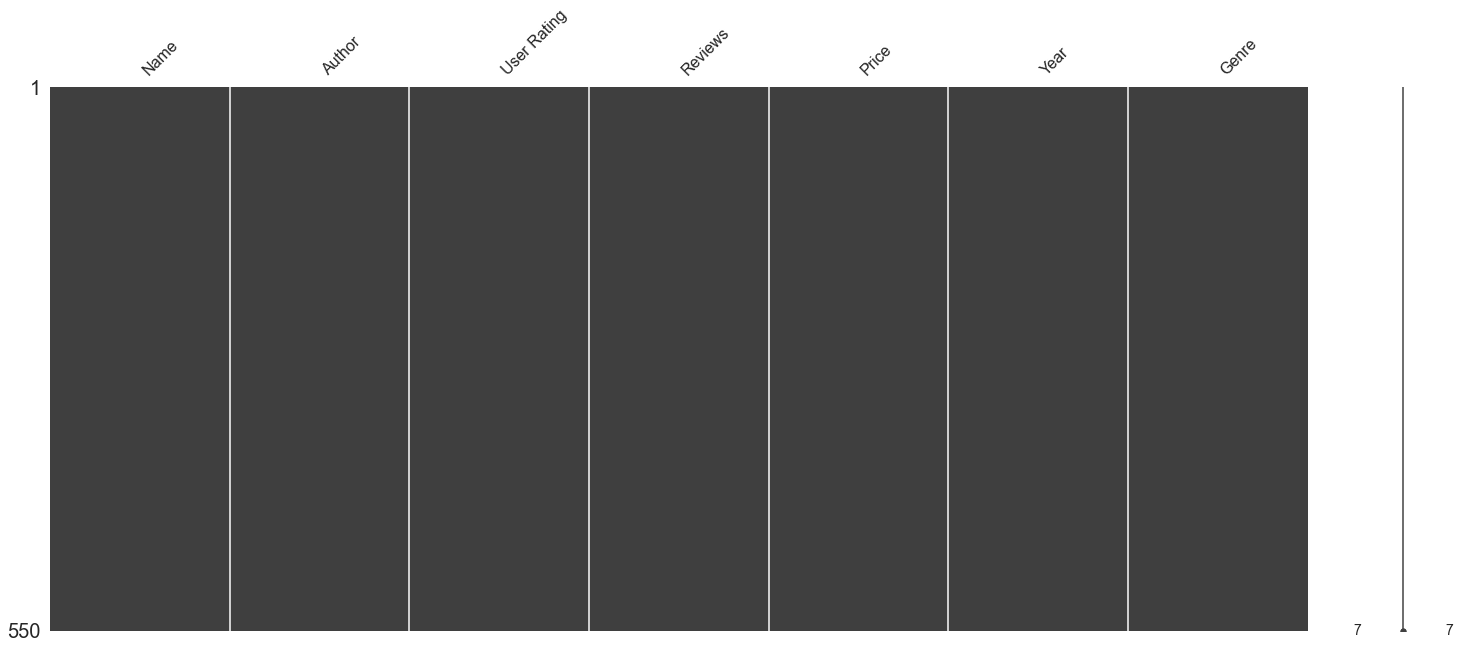

In [81]:
#Build a matrix of missing values
missingno.matrix(df,fontsize=16)
plt.show()

<AxesSubplot:>

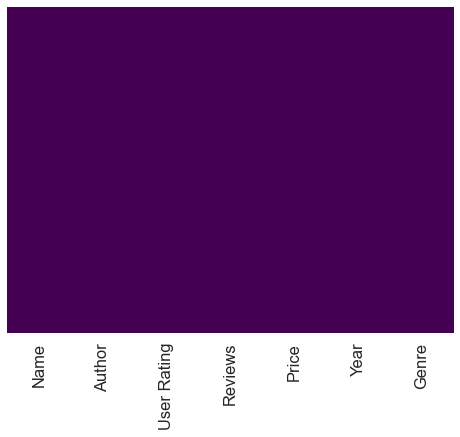

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Perfectly clean data


In [80]:
categorical_col = [col for col in df.columns if df[col].dtype == 'object']
categorical_col

['Name', 'Author', 'Genre']

In [82]:
nonCatetorical_col = [col for col in df.columns if df[col].dtype != 'object']
nonCatetorical_col

['User Rating', 'Reviews', 'Price', 'Year']

In [84]:
df['Name']=df['Name'].str.title().str.strip()
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules For Life: An Antidote To Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [85]:
genre =  df['Genre'].unique()
genre

array(['Non Fiction', 'Fiction'], dtype=object)

In [88]:
years = sorted(df['Year'].unique())
years

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [89]:
authors = df['Author'].unique()
authors

array(['JJ Smith', 'Stephen King', 'Jordan B. Peterson', 'George Orwell',
       'National Geographic Kids', 'George R. R. Martin', 'Amor Towles',
       'James Comey', 'Fredrik Backman', 'Larry Schweikart',
       'Jaycee Dugard', "Madeleine L'Engle", 'Steve Harvey',
       'Adult Coloring Book Designs', 'Blue Star Coloring',
       'Coloring Books for Adults', 'Ron Chernow', 'Anthony Doerr',
       'Veronica Roth', 'Chris Kyle', 'Khaled Hosseini', 'Glenn Beck',
       'Neil deGrasse Tyson', 'Mark Twain', 'DK', 'Angie Grace',
       'Ina Garten', 'Michelle Obama', 'Atul Gawande', 'Ta-Nehisi Coates',
       'Bruce Springsteen', 'Stephenie Meyer', 'Bill Martin Jr.',
       'Jeff Kinney', "Sasha O'Hara", 'David Goggins', 'Thomas Piketty',
       'Suzanne Collins', 'Chrissy Teigen', 'Francis Chan', 'Kevin Kwan',
       'Marjorie Sarnat', 'Abraham Verghese', 'Brené Brown',
       'Malcolm Gladwell', 'Charlaine Harris', 'Rod Campbell',
       'George W. Bush', 'Tony Hsieh', 'American Psych

In [8]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

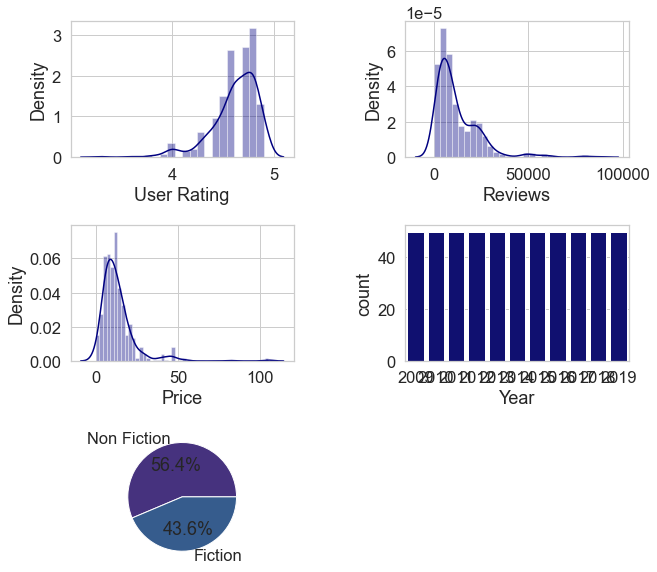

In [72]:
# Density of all the numerical columns

plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.distplot(df['User Rating'],color='navy')
plt.subplot(3,2,2)
sns.distplot(df['Reviews'],color='navy')
plt.subplot(3,2,3)
sns.distplot(df['Price'],color='navy')
plt.subplot(3,2,4)
sns.countplot(df['Year'],color='navy')
plt.subplot(3,2,5)
plt.pie(df['Genre'].value_counts(),labels=['Non Fiction','Fiction'],autopct='%.1f%%')

# increase space between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)


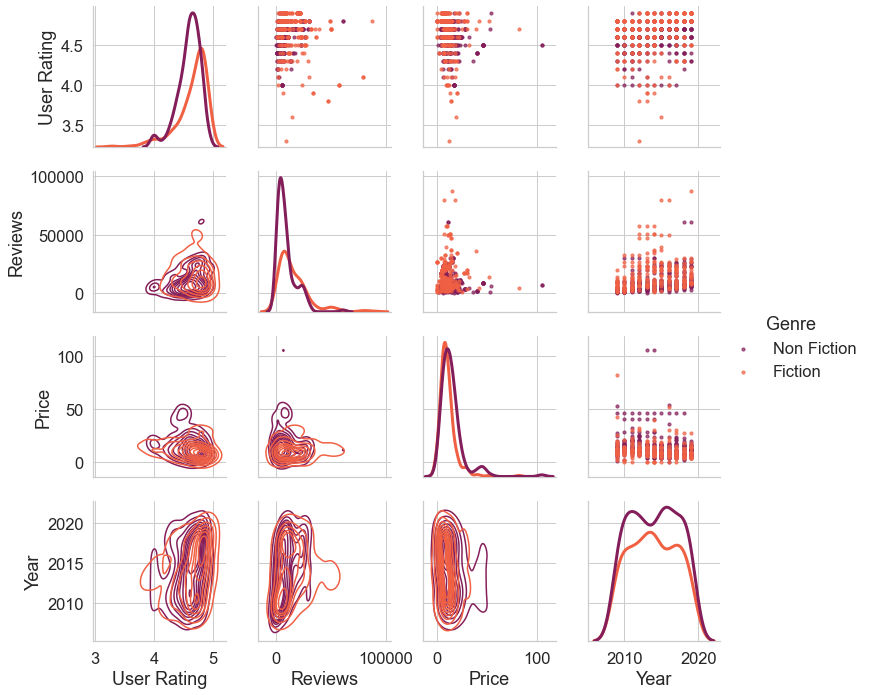

In [95]:
g = sns.PairGrid(df,hue='Genre',palette='rocket',size=2.5,diag_sharey=False)
g.map_diag(sns.kdeplot,lw=3)
g.map_lower(sns.kdeplot,cmap='Blues_d',lw=3)
g.map_upper(plt.scatter,s=10,alpha=0.7)
g.add_legend()

<AxesSubplot:xlabel='User Rating', ylabel='count'>

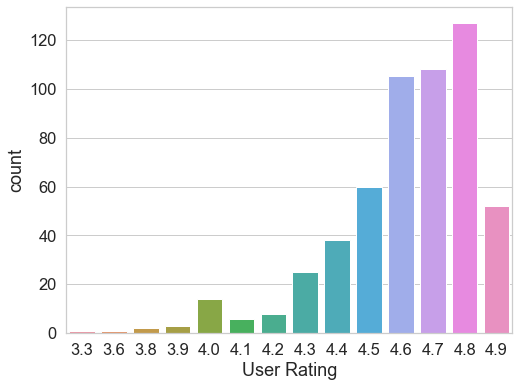

In [21]:
sns.countplot(x='User Rating', data=df)

In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User Rating,550.0,4.618364,0.226980,3.3,4.5,4.7,4.80,4.9
Reviews,550.0,11953.281818,11731.132017,37.0,4058.0,8580.0,17253.25,87841.0
Price,550.0,13.100000,10.842262,0.0,7.0,11.0,16.00,105.0
Year,550.0,2014.000000,3.165156,2009.0,2011.0,2014.0,2017.00,2019.0


In [17]:
df['User Rating'].value_counts()

4.8    127
4.7    108
4.6    105
4.5     60
4.9     52
4.4     38
4.3     25
4.0     14
4.2      8
4.1      6
3.9      3
3.8      2
3.6      1
3.3      1
Name: User Rating, dtype: int64

In [18]:
df['User Rating'].describe()

count    550.000000
mean       4.618364
std        0.226980
min        3.300000
25%        4.500000
50%        4.700000
75%        4.800000
max        4.900000
Name: User Rating, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Count'>

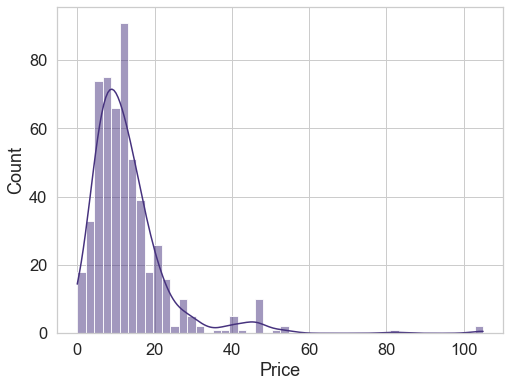

In [26]:
sns.histplot(x='Price', data=df,kde=True)


In [27]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


<AxesSubplot:xlabel='Reviews', ylabel='Count'>

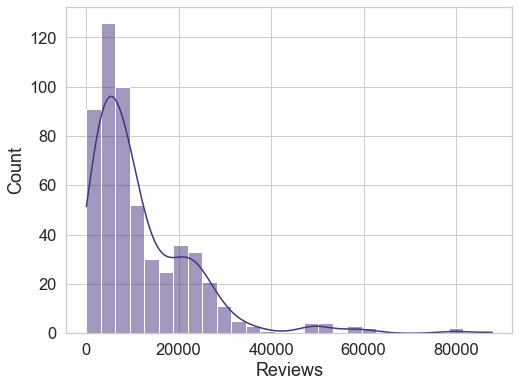

In [28]:
sns.histplot(x='Reviews', data=df,kde=True)

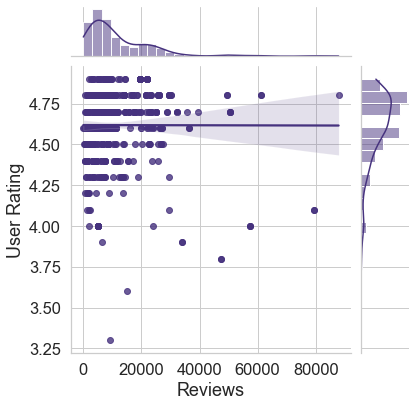

In [31]:
sns.jointplot(x='Reviews', y='User Rating', data=df, kind='reg')

<AxesSubplot:>

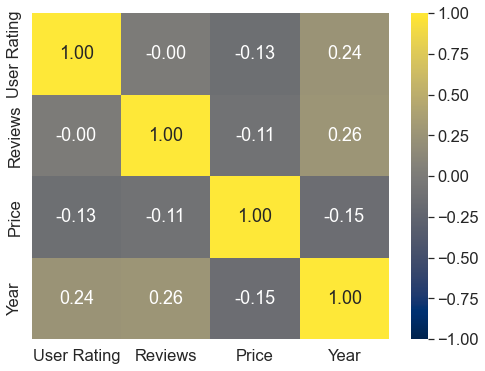

In [100]:
sns.heatmap(df.corr(), annot=True, cmap='cividis', fmt='.2f',vmin=-1,vmax=1)

<AxesSubplot:xlabel='Genre', ylabel='Count'>

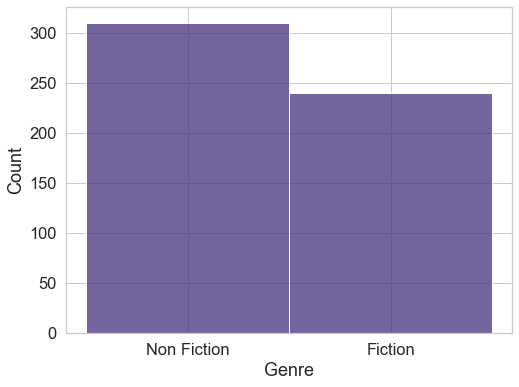

In [34]:
sns.histplot(x='Genre', data=df,kde=False)

In [36]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [43]:
# Book with most reviews
book = df.groupby('Name').agg({'Reviews':'sum'}).sort_values('Reviews', ascending=False).head(1)
print("Book with most reviews:", book.index[0])

Book with most reviews: The Fault in Our Stars


In [41]:
df.groupby('Genre').aggregate({'Reviews':'sum'}).sort_values('Reviews', ascending=False)

,Reviews
Genre,
Fiction,3764110
Non Fiction,2810195


In [46]:
# Books with highest reviews
books = df.groupby('User Rating').sum().sort_values('Reviews', ascending=False).head(10)
books


,Reviews,Price,Year
User Rating,,,
4.8,1757694,1380,255896
4.7,1475380,1403,217494
4.6,972304,1270,211398
4.9,673786,535,104837
4.5,553867,1256,120805
4.4,267481,549,76487
4.0,243266,205,28181
4.3,209072,332,50342
4.1,194305,70,12078


In [50]:
# Names of top rated 4.9 books
topRated = set([book for book in df['Name'] if df['User Rating'][df['Name'] == book].values[0] == 4.9])
topRated

{'Brown Bear, Brown Bear, What Do You See?',
 'Dog Man and Cat Kid: From the Creator of Captain Underpants (Dog Man #4)',
 'Dog Man: A Tale of Two Kitties: From the Creator of Captain Underpants (Dog Man #3)',
 'Dog Man: Brawl of the Wild: From the Creator of Captain Underpants (Dog Man #6)',
 'Dog Man: Fetch-22: From the Creator of Captain Underpants (Dog Man #8)',
 'Dog Man: For Whom the Ball Rolls: From the Creator of Captain Underpants (Dog Man #7)',
 'Dog Man: Lord of the Fleas: From the Creator of Captain Underpants (Dog Man #5)',
 'Goodnight, Goodnight Construction Site (Hardcover Books for Toddlers, Preschool Books for Kids)',
 'Hamilton: The Revolution',
 'Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)',
 'Harry Potter and the Goblet of Fire: The Illustrated Edition (Harry Potter, Book 4) (4)',
 'Harry Potter and the Prisoner of Azkaban: The Illustrated Edition (Harry Potter, Book 3)',
 "Harry Potter and the Sorcerer's Stone: The Illust

In [57]:
topRatedBooks = df[df['Name'].isin(topRated)]
# only unique rows in topRatedBooks
topRatedBooks = topRatedBooks.drop_duplicates(subset='Name', keep='first')
topRatedBooks


,Name,Author,User Rating,Reviews,Price,Year,Genre
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019,Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction


<AxesSubplot:>

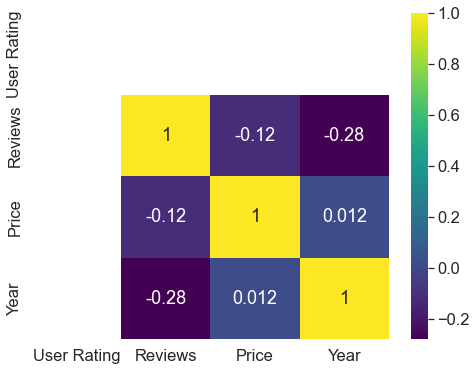

In [59]:
sns.heatmap(topRatedBooks.corr(), annot=True, cmap='viridis')

In [62]:
topRatedBooks['Price'].describe()

count    28.000000
mean     12.964286
std      11.057031
min       0.000000
25%       6.000000
50%       8.000000
75%      17.250000
max      54.000000
Name: Price, dtype: float64

In [108]:
# percentage of free books
free = df['Price'].value_counts()[0]
notFree = df['Price'].value_counts().sum() - free

print("Percentage of free books:", free/(notFree+free)*100)
print("Percentage of non free books:", notFree/df['Price'].value_counts().sum()*100)


Percentage of free books: 2.181818181818182
Percentage of non free books: 97.81818181818181


In [109]:
df['Free'] = df['Price'].apply(lambda x: 1 if x == 0 else 0)
df

,Name,Author,User Rating,Reviews,Price,Year,Genre,Free
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,0
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,0
2,12 Rules For Life: An Antidote To Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,0
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,0
...,...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary Of A Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,0
546,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction,0
547,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction,0
548,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction,0


<AxesSubplot:xlabel='Free', ylabel='count'>

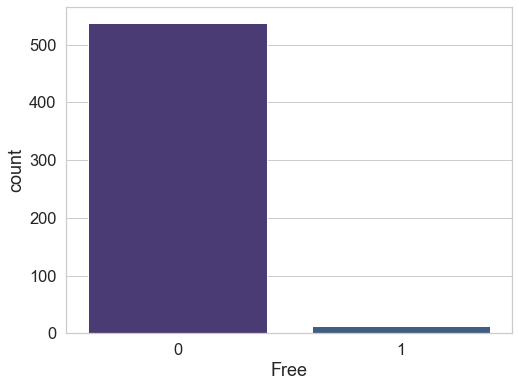

In [113]:
sns.countplot(x='Free', data=df)

In [116]:
priceFiction = np.mean(df.loc[df['Genre'] == 'Fiction', 'Price'])
priceNonFiction = np.mean(df.loc[df['Genre'] == 'Non Fiction', 'Price'])

print("Average price of fiction books:", priceFiction)
print("Average price of non fiction books:", priceNonFiction)

if(priceFiction > priceNonFiction):
    print("Fiction is more expensive than Non Fiction")
else:
    print("Non Fiction is more expensive than Fiction")


Average price of fiction books: 10.85
Average price of non fiction books: 14.841935483870968
Non Fiction is more expensive than Fiction
